In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [5]:
data = open('telefonyorumlar.txt', 'r',encoding ='utf-8').read().split("/")
data


['Arkadaslar tavsiye olarak once sunu belirteyim, urunu kullanmamis ve dahasi yakindan bile gormemis kisilerin yorumlari neden yayinlanir bilmiyorum. Bu tarz yorumlari dikkate almamanizi oneririm. \nM11 cihazini kullanmaya baslayali 5 gun oldu.\nOncelikle cihazin gorunumu cok zarif. Damla centik yerine ekrana gomulu kamera hos bir hava katmis. 13+5+2 mp olmak uzere uclu kamerasi bulunmasi da ayri bir guzellik. Fotograf cekimlerinde arka kameralar gunduz cekimlerinde guzel sonuc verirken gece cekimleri vasat diyebilirim. On kamera ise her durumda kotu, selficileri uzer.\nSes sistemi dolby atmos iceriyor. Kulaklikli ve kulaksiz yeterli seviyede performans aldim.\nTelefonla oyun oynamadigim icin oyun performansina yorum yapamam, ancak her ne kadar olumlu deneme videolari izlediysem de snapdragon 450 yonga seti ve 3 gb ram ile oyun canavarlarini tatmin etmeyecegini dusunuyorum.\nSar degerleri 0.52 bas, 0.99 vucut. Android telefonlarda yasal sinir 2 olsa da bu degerlerin dusuk olmasi her za

In [6]:
split_data=[]
for comment in data:
    split_data.append(comment)

In [7]:
data_df = pd.DataFrame(split_data,columns = ['comment']) 
data_hepsi = data_df.copy()
#data_df

In [8]:
#Fetch wordcount for each abstract
data_df['word_count'] = data_df['comment'].apply(lambda x: len(str(x).split(" ")))
data_df[['comment','word_count']].head()

,comment,word_count
0,Arkadaslar tavsiye olarak once sunu belirteyim...,249
1,Telefonu alıp kullanmış birisi olarak yazıyoru...,60
2,Ürünü bir haftadir kullanan biri olarak yorum ...,267
3,Samsung'un giriş seviyesi olarak adlandirdigi ...,93
4,Hızlı kargo ve paketleme muhteşem .Kesinlikle...,9


In [9]:
##Descriptive statistics of word counts
data_df.word_count.describe()

count    17968.000000
mean        31.040962
std         37.994372
min          1.000000
25%          9.000000
50%         19.000000
75%         38.000000
max        418.000000
Name: word_count, dtype: float64

In [10]:
#Identify common words
freq = pd.Series(' '.join(data_df['comment']).split()).value_counts()[:20]
freq

bir        10734
ve         10053
çok        10053
iyi         5663
telefon     5238
bu          5072
için        3767
ama         3653
güzel       3545
daha        3186
da          3178
gayet       2939
olarak      2909
ile         2604
de          2481
hızlı       2462
gün         2251
en          2216
gibi        2079
tavsiye     1894
dtype: int64

In [11]:
stop_words = open('turkce-stop-words', 'r',encoding ='utf-8').read().split()
#stopwords


In [12]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data_df 
         ['comment']).split()).value_counts()[-20:]
freq1

bütçesinin            1
larda).               1
değiştirilecek        1
oluyırdu              1
ALIŞVERİŞTEN          1
uygulaması)           1
değiştirdik.          1
yakalandığında        1
muazzam,kulaklıkla    1
rakamlara...!!        1
yakarken              1
LCD).                 1
kılmıştım             1
seyir                 1
taktigimda            1
yönlendiriyor         1
1Haftadır             1
efsaneymis            1
varmı.                1
aldım.Satici          1
dtype: int64

In [39]:
corpus = []
for i in range(0, 17968):
    #Remove punctuations
    text = re.sub(' ', ' ', data_df['comment'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    ##Stemming
    #ps=PorterStemmer()
    #Lemmatisation
    #lem = WordNetLemmatizer()
    #text = [lem.lemmatize(word) for word in text if not word in  
    #        stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [40]:
#View corpus item
corpus[222]

'öncelikle hepsiburada ve hepsiburada jet kargoya çok teşekkür ederim tam saatinde getirdi telefon genel olarak çok iyi gb hafıza olsun kamera olsun tasarım olsun tek sorunu note de p ve fps çekerken bu fps güncelleme ile düzeltilecek diye biliyorum alan pişman olmaz'

# Data Exploration

In [41]:
#Word cloud
from os import path
import PIL
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [42]:
print( data_df['comment'][0])

Arkadaslar tavsiye olarak once sunu belirteyim, urunu kullanmamis ve dahasi yakindan bile gormemis kisilerin yorumlari neden yayinlanir bilmiyorum. Bu tarz yorumlari dikkate almamanizi oneririm. 
M11 cihazini kullanmaya baslayali 5 gun oldu.
Oncelikle cihazin gorunumu cok zarif. Damla centik yerine ekrana gomulu kamera hos bir hava katmis. 13+5+2 mp olmak uzere uclu kamerasi bulunmasi da ayri bir guzellik. Fotograf cekimlerinde arka kameralar gunduz cekimlerinde guzel sonuc verirken gece cekimleri vasat diyebilirim. On kamera ise her durumda kotu, selficileri uzer.
Ses sistemi dolby atmos iceriyor. Kulaklikli ve kulaksiz yeterli seviyede performans aldim.
Telefonla oyun oynamadigim icin oyun performansina yorum yapamam, ancak her ne kadar olumlu deneme videolari izlediysem de snapdragon 450 yonga seti ve 3 gb ram ile oyun canavarlarini tatmin etmeyecegini dusunuyorum.
Sar degerleri 0.52 bas, 0.99 vucut. Android telefonlarda yasal sinir 2 olsa da bu degerlerin dusuk olmasi her zaman ici

In [43]:
stop_words = open('turkce-stop-words', 'r',encoding ='utf-8').read().split()
#stopwords
data_df['comment'][0]

'Arkadaslar tavsiye olarak once sunu belirteyim, urunu kullanmamis ve dahasi yakindan bile gormemis kisilerin yorumlari neden yayinlanir bilmiyorum. Bu tarz yorumlari dikkate almamanizi oneririm. \nM11 cihazini kullanmaya baslayali 5 gun oldu.\nOncelikle cihazin gorunumu cok zarif. Damla centik yerine ekrana gomulu kamera hos bir hava katmis. 13+5+2 mp olmak uzere uclu kamerasi bulunmasi da ayri bir guzellik. Fotograf cekimlerinde arka kameralar gunduz cekimlerinde guzel sonuc verirken gece cekimleri vasat diyebilirim. On kamera ise her durumda kotu, selficileri uzer.\nSes sistemi dolby atmos iceriyor. Kulaklikli ve kulaksiz yeterli seviyede performans aldim.\nTelefonla oyun oynamadigim icin oyun performansina yorum yapamam, ancak her ne kadar olumlu deneme videolari izlediysem de snapdragon 450 yonga seti ve 3 gb ram ile oyun canavarlarini tatmin etmeyecegini dusunuyorum.\nSar degerleri 0.52 bas, 0.99 vucut. Android telefonlarda yasal sinir 2 olsa da bu degerlerin dusuk olmasi her zam

In [44]:
#data_df['comment'][0] = re.sub('Arkadaslar', ' ', data_df['comment'][0])
#data_df['comment'][0]

In [45]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=30, 
                          random_state=42
                         ).generate(str(corpus))

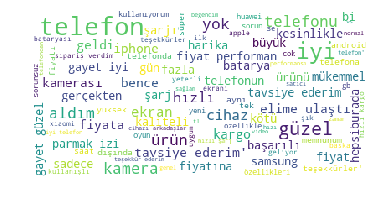

In [46]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1500)

# Creating a vector of word counts

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.5,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [48]:
list(cv.vocabulary_.keys())[:10]


['arkadaslar',
 'tavsiye',
 'once',
 'sunu',
 'belirteyim',
 'urunu',
 'bilmiyorum',
 'tarz',
 'dikkate',
 'oneririm']

# Visualize top N uni-grams, bi-grams & tri-grams


In [49]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [50]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'çok'),
 Text(0, 0, 'bir'),
 Text(0, 0, 've'),
 Text(0, 0, 'telefon'),
 Text(0, 0, 'iyi'),
 Text(0, 0, 'bu'),
 Text(0, 0, 'güzel'),
 Text(0, 0, 'ama'),
 Text(0, 0, 'için'),
 Text(0, 0, 'ürün'),
 Text(0, 0, 'daha'),
 Text(0, 0, 'da'),
 Text(0, 0, 'hızlı'),
 Text(0, 0, 'gayet'),
 Text(0, 0, 'yok'),
 Text(0, 0, 'olarak'),
 Text(0, 0, 'aldım'),
 Text(0, 0, 'de'),
 Text(0, 0, 'ile'),
 Text(0, 0, 'kargo')]

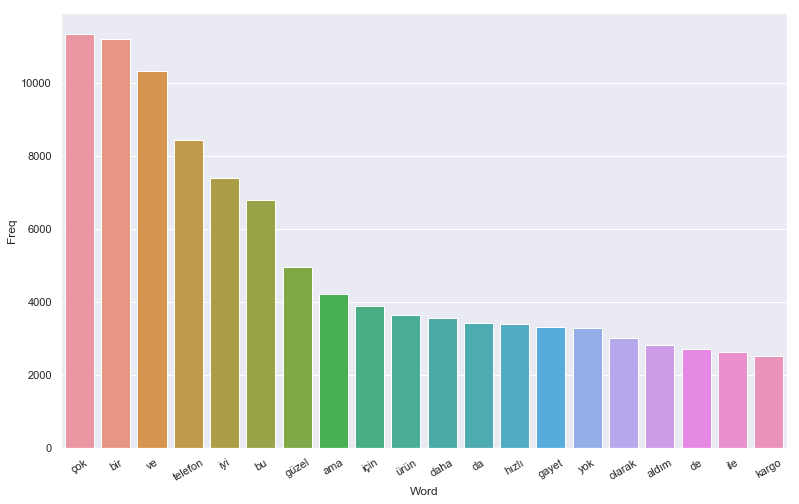

In [51]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [52]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [53]:
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

             Bi-gram  Freq
0            çok iyi  2228
1        bir telefon  2121
2     tavsiye ederim  1682
3          çok güzel  1226
4          bu fiyata  1081
5       elime ulaştı  1041
6   fiyat performans   791
7      fiyatına göre   771
8          gayet iyi   766
9        gayet güzel   764
10            en iyi   739
11          daha iyi   727
12        parmak izi   720
13         çok hızlı   635
14   teşekkür ederim   577
15         bir cihaz   557
16       bir şekilde   551
17         güzel bir   530
18         gerek yok   524
19          bir ürün   500


[Text(0, 0, 'çok iyi'),
 Text(0, 0, 'bir telefon'),
 Text(0, 0, 'tavsiye ederim'),
 Text(0, 0, 'çok güzel'),
 Text(0, 0, 'bu fiyata'),
 Text(0, 0, 'elime ulaştı'),
 Text(0, 0, 'fiyat performans'),
 Text(0, 0, 'fiyatına göre'),
 Text(0, 0, 'gayet iyi'),
 Text(0, 0, 'gayet güzel'),
 Text(0, 0, 'en iyi'),
 Text(0, 0, 'daha iyi'),
 Text(0, 0, 'parmak izi'),
 Text(0, 0, 'çok hızlı'),
 Text(0, 0, 'teşekkür ederim'),
 Text(0, 0, 'bir cihaz'),
 Text(0, 0, 'bir şekilde'),
 Text(0, 0, 'güzel bir'),
 Text(0, 0, 'gerek yok'),
 Text(0, 0, 'bir ürün')]

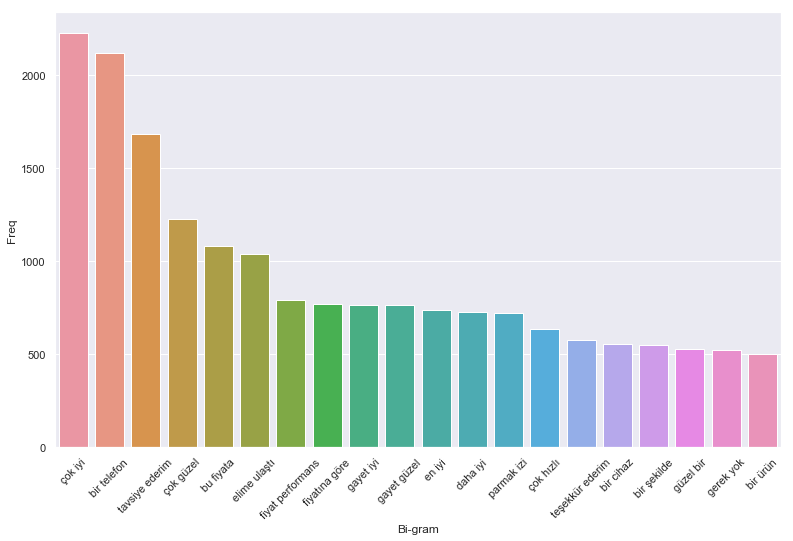

In [54]:
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [55]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [56]:
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)


                     Tri-gram  Freq
0              en iyi telefon   278
1      fiyat performans ürünü   263
2           güzel bir telefon   258
3             iyi bir telefon   207
4         alınabilecek en iyi   205
5                bu fiyata bu   194
6   kesinlikle tavsiye ederim   193
7           fiyatına göre çok   162
8      herkese tavsiye ederim   162
9           çok memnun kaldım   161
10    fiyat performans olarak   160
11     bu fiyata alınabilecek   149
12              tam bir fiyat   149
13                çok iyi bir   148
14              çok güzel bir   147
15         günde elime ulaştı   141
16               göre çok iyi   138
17         harika bir telefon   136
18       bir fiyat performans   134
19                çok çok iyi   125


[Text(0, 0, 'en iyi telefon'),
 Text(0, 0, 'fiyat performans ürünü'),
 Text(0, 0, 'güzel bir telefon'),
 Text(0, 0, 'iyi bir telefon'),
 Text(0, 0, 'alınabilecek en iyi'),
 Text(0, 0, 'bu fiyata bu'),
 Text(0, 0, 'kesinlikle tavsiye ederim'),
 Text(0, 0, 'fiyatına göre çok'),
 Text(0, 0, 'herkese tavsiye ederim'),
 Text(0, 0, 'çok memnun kaldım'),
 Text(0, 0, 'fiyat performans olarak'),
 Text(0, 0, 'bu fiyata alınabilecek'),
 Text(0, 0, 'tam bir fiyat'),
 Text(0, 0, 'çok iyi bir'),
 Text(0, 0, 'çok güzel bir'),
 Text(0, 0, 'günde elime ulaştı'),
 Text(0, 0, 'göre çok iyi'),
 Text(0, 0, 'harika bir telefon'),
 Text(0, 0, 'bir fiyat performans'),
 Text(0, 0, 'çok çok iyi')]

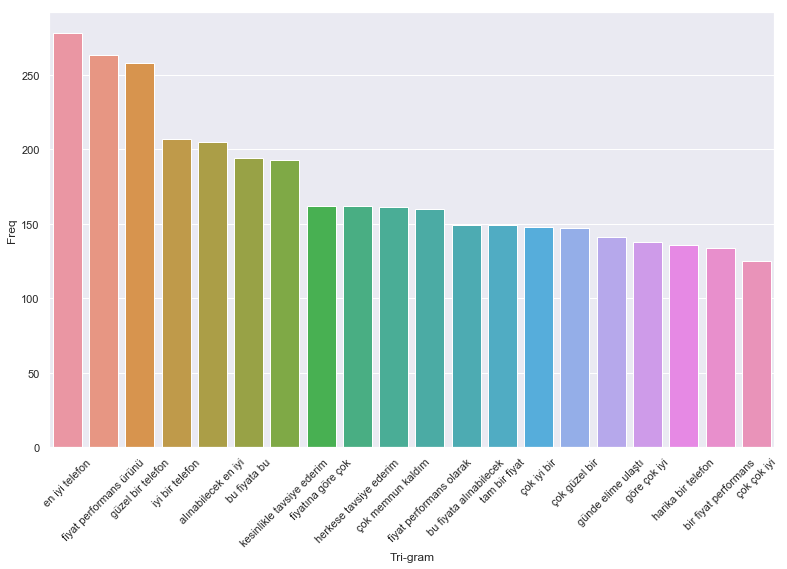

In [57]:
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

# Converting to a matrix of integers


TF-IDF consists of 2 components:
TF — term frequency
IDF — Inverse document frequency


In [97]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)  #X=cv.fit_transform(corpus)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
print(len(corpus))
document = ""
document2 = ""


for i in range(9000):
    document = document+" "+corpus[i]
for i in range(9001,17967):
    document2 = document2+" "+corpus[i]    

    
doc= document#corpus[1]
doc2= document2

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))


17968


In [99]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=200):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,150)
 
# now print the results
print("\Comment:")
#print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

\Comment:

Keywords:
telefon 0.265
iyi 0.253
güzel 0.196
ürün 0.155
gayet 0.15
hızlı 0.149
kargo 0.137
yok 0.135
aldım 0.125
gün 0.123
ekran 0.121
ederim 0.117
geldi 0.116
telefonu 0.113
tavsiye 0.11
kamera 0.108
fiyat 0.105
şarj 0.099
elime 0.097
teşekkürler 0.094
ürünü 0.091
tavsiye ederim 0.09
hepsiburada 0.089
kamerası 0.089
cihaz 0.086
performans 0.086
ulaştı 0.085
cok 0.079
fiyata 0.077
samsung 0.074
gerçekten 0.072
başarılı 0.072
harika 0.071
kullanıyorum 0.071
oyun 0.07
iphone 0.069
note 0.069
sipariş 0.067
bi 0.067
elime ulaştı 0.067
gb 0.066
bence 0.066
tek 0.066
parmak 0.065
saat 0.065
kalitesi 0.064
fiyat performans 0.064
mükemmel 0.063
kesinlikle 0.063
telefonun 0.063
şarjı 0.061
sorun 0.061
teşekkür 0.059
gidiyor 0.058
teslim 0.057
memnunum 0.057
uzun 0.055
fiyatına 0.054
batarya 0.054
süper 0.054
sadece 0.053
günü 0.053
verdim 0.053
günde 0.052
aynı 0.052
izi 0.052
parmak izi 0.051
iyi telefon 0.051
kulaklık 0.051
gayet güzel 0.051
gayet iyi 0.05
fazla 0.05
ses 0.05
memn

In [ ]:
Keywords:
telefon 0.264
iyi 0.254
güzel 0.178
yok 0.158
ürün 0.15
gayet 0.145
hızlı 0.142
aldım 0.13
ekran 0.128
telefonu 0.122
kamera 0.116
gün 0.11
ederim 0.109
tavsiye 0.108
kargo 0.1
iphone 0.1
fiyat 0.099
geldi 0.097
teşekkürler 0.096
şarj 0.093